In [1]:
import pandas as pd
df= pd.read_csv("SP1.csv")
df.describe()

,age,absences,G1,G2,G3
count,991.000000,991.000000,991.000000,991.000000,991.000000
mean,16.696266,4.672048,11.417760,11.611504,11.948537
std,1.233201,6.286463,2.895669,2.831181,2.912248
min,15.000000,0.000000,0.000000,5.000000,1.000000
25%,16.000000,0.000000,9.000000,10.000000,10.000000
50%,17.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,19.000000,19.000000,20.000000


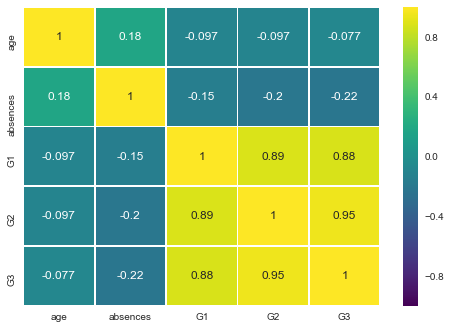

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=.8, cmap='viridis')
plt.show()

In [3]:
import statsmodels.formula.api as smf
Est = smf.ols(formula='G3~age+C(sex)+absences+G1*G2+C(Subject)', data=df).fit()
Est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1361.
Date:                Sun, 30 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:57:24   Log-Likelihood:                -1290.9
No. Observations:                 991   AIC:                             2598.
Df Residuals:                     983   BIC:                             2637.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2552      0.608      0.420      0.675      -0.938       1.448
C(sex)[T.M]            -0.0965      0.058     -1.677      0.094      -0.209       0.016
C(Subject)[T.Maths]    -0.2667      0.061     -4.339      0.000      -0.387      -0.146
age                     0.0448      0.024      1.895      0.058      -0.002       0.091
absences               -0.0123      0.005     -2.571      0.010      -0.022      -0.003
G1                      0.1465      0.041      3.598      0.000       0.067       0.226
G2                      0.7940      0.043     18.680      0.000       0.711       0.877
G1:G2                   0.0018      0.003      0.595      0.552      -0.004       0.008
==============================================================================
Omnibus:                      340.150   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8410.453
Skew:                          -0.995   Prob(JB):                         0.00
Kurtosis:                      17.132   Cond. No.                     3.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

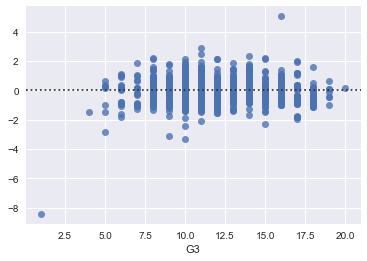

In [4]:
import matplotlib.pyplot as plt 
% matplotlib inline
import seaborn as sns
sns.residplot(df.G3,Est.resid)

ANN

In [5]:
import pandas as pd
df= pd.read_csv("SP1.csv")
print(df.info())
print(df.head())
col_dummies1 = pd.get_dummies(df['sex'], prefix='G_',drop_first=True)
df= pd.concat([df, col_dummies1], axis=1)
df=df.drop('sex', axis = 1)
col_dummies2 = pd.get_dummies(df['Subject'], prefix='S_',drop_first=True)
df= pd.concat([df, col_dummies2], axis=1)
df=df.drop('Subject', axis = 1)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
sex         991 non-null object
age         991 non-null int64
absences    991 non-null int64
G1          991 non-null int64
G2          991 non-null int64
G3          991 non-null int64
Subject     991 non-null object
dtypes: int64(5), object(2)
memory usage: 54.3+ KB
None
  sex  age  absences  G1  G2  G3 Subject
0   F   18         6   5   6   6   Maths
1   F   17         4   5   5   6   Maths
2   F   15        10   7   8  10   Maths
3   F   15         2  15  14  15   Maths
4   F   16         4   6  10  10   Maths


,age,absences,G1,G2,G3,G__M,S__Maths
0,18,6,5,6,6,0,1
1,17,4,5,5,6,0,1
2,15,10,7,8,10,0,1
3,15,2,15,14,15,0,1
4,16,4,6,10,10,0,1


In [6]:
#Preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
df['age'] = scaler1.fit_transform(df[['age']])
df['absences'] = scaler1.fit_transform(df[['absences']])
df['G1']=(df.G1)/20
df['G2']=(df.G2)/20
df['G3']=(df.G3)/20

C:\Users\Naruto\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Naruto\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
x=df.drop('G3',axis=1)
y=df.G3
print(x[:4])

        age  absences    G1    G2  G__M  S__Maths
0  0.428571  0.080000  0.25  0.30     0         1
1  0.285714  0.053333  0.25  0.25     0         1
2  0.000000  0.133333  0.35  0.40     0         1
3  0.000000  0.026667  0.75  0.70     0         1


In [8]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = Sequential()
model.add(Dense(1, input_dim=6))
#model.add(Dense(1, kernel_initializer='normal'))
print(model.summary())

# Compile model
#optimizer = SGD(lr=0.01)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])
from sklearn.metrics import r2_score
model.fit(x=X_train, y=y_train, batch_size=5, epochs=100,shuffle=True)
y_pred = model.predict(X_test)
r2_score = r2_score(y_pred=y_pred, y_true=y_test)
r2_score

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
792/792 [==============================] - 2s 2ms/step - loss: 0.1658 - acc: 0.0013
Epoch 2/100
792/792 [==============================] - 0s 246us/step - loss: 0.0974 - acc: 0.0013
Epoch 3/100
792/792 [==============================] - 0s 235us/step - loss: 0.0569 - acc: 0.0013
Epoch 4/100
792/792 [==============================] - 0s 232us/step - loss: 0.0329 - acc: 0.0013
Epoch 5/100
792/792 [==============================] - 0s 245us/step - loss: 0.0192 - acc: 0.0013
Epoch 6/100
792/792 [==============================] - 0s 250us/step - loss: 0.0120 - acc: 0.0013ETA: 0s - loss: 0.0168 - acc: 0.0000e
Epoch 7/100
792/792 [===========================

0.91015165912235

In [9]:
y_pred=y_pred*20
y_true=y_test*20
print(y_pred[:8])
print(y_true[:8])

[[ 9.431284]
 [10.200947]
 [11.620197]
 [15.183362]
 [10.220158]
 [ 7.562336]
 [17.951796]
 [17.617432]]
213     9.0
331    10.0
501    11.0
309    15.0
88     10.0
535     8.0
280    18.0
107    18.0
Name: G3, dtype: float64


In [10]:
data1 = pd.DataFrame(y_pred)
data2 = pd.DataFrame(y_true)
print('Predicted values')
print(data1.head())
print('Original values')
print(data2.head())

Predicted values
           0
0   9.431284
1  10.200947
2  11.620197
3  15.183362
4  10.220158
Original values
       G3
213   9.0
331  10.0
501  11.0
309  15.0
88   10.0
